In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import time
import copy
from sklearn.preprocessing import minmax_scale



import csv 
from pathlib import Path
from os import listdir
import pickle

from labeling_utils import load_labels

import numpy as np
from sklearn.metrics import precision_recall_fscore_support

from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from datetime import datetime,timedelta
import math

import itertools
from matplotlib.pyplot import cycler
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.cm

from fileUtils import read_file_properties

import pickle


import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
# from matplotlib.dates import AutoDateLocator
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter

# import matplotlib.pyplot as plt

from matplotlib import cm
from numpy import linspace


from pytz import timezone


In [4]:
from pre_process_func import read_queue


In [4]:
# INPUT_DIR_PARENT = "/home/data/nna/stinchcomb/NUI_DATA/"


In [5]:
flder="/home/enis/projects/nna/data/"

files_list_path=flder+"mp3files.txt"
fileswlen_path = flder+"mp3files_wlen.txt"

# files_list_path=flder+"flacfiles.txt"
# fileswlen_path = flder+"flacfiles_wlen.txt"

coordinates_fpath= flder + "NNA_recording_devices.csv"

In [6]:
# get all files from given list in a txt
with open(files_list_path,"r") as mp3files:
    mp3files=mp3files.readlines()
    mp3files=[i.strip() for i in mp3files]

thelen=([Path(file).stem for file in mp3files])
theset=(set([Path(file).stem for file in mp3files]))
for a in theset:
    del thelen[thelen.index(a)]
print(thelen)

mp3filesset=list()
mp3filestemset=[]
for file in mp3files:
    if Path(file).stem not in mp3filestemset:
        mp3filestemset.append(Path(file).stem)
        mp3filesset.append(file)
mp3files=mp3filesset[:]

# Read file properties
# file_properties,exceptions=read_file_properties(mp3files)

file_properties,exceptions=read_file_properties(mp3files)

['UMIRUK_20160621_083400', 'UMIRUK_20160623_101515', 'CLVL4_20160623_084159', 'CLVL4_20160606_191142', 'CLVL4_20160602_154908', 'CLVL4_20160621_070042', 'CLVL4_20160608_205258', 'CLVL4_20160619_051925', 'CLVL4_20160615_015650', 'CLVL4_20160604_173026', 'CLVL4_20160610_223415', 'CLVL4_20160602_153918', 'CLVL4_20160617_033807', 'CLVL4_20160613_001533']


In [7]:
file_properties,exceptions=read_file_properties(mp3files)

In [56]:
for key,val in file_properties.items():
    if val["year"]!="2016":
        print(key)

/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130725_210243.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130730_002508.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130713_180248.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130801_020621.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130805_052845.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130723_192129.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130727_224356.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130722_004741.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130717_212516.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130803_034733.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130715_194403.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Umiat/July 2016/UMIAT_20130719_230628.MP3
/home/data/nna/stinchcomb/NUI_DATA/20 Um

In [ ]:
#         if year==2013:
#             year=2016

In [8]:


# remove A,B
sets=set()
for f in file_properties:
    site_name=file_properties[f]['site_name']
    if site_name=="Data":
        file_properties[f]['site_name']="35"
    else:
        file_properties[f]['site_name']=file_properties[f]['site_name'][:-1]
    sets.add(file_properties[f]['site_name'])

In [9]:
weather={}
weather_data_path="/home/enis/projects/nna/data/weather_data_prudhoe-bay.pkl"

with open(weather_data_path,"rb") as wdata:
    wdata=pickle.load(wdata)


# we add tmstamp_valid":tmstamp_valid to data
weather_id_name={"temp":"temp", 
                 "pressure":"pressure",
                 "wspd":"windspeed",
                "precip_hrly":"Precipitation",
                "vis":"Visibility"}
weather_cols=list(weather_id_name.values())



#correct time zones and filter unwanted data from each day
filtered_data=[]
for data in wdata:
    tmstamp_valid = datetime.fromtimestamp(time.mktime(time.gmtime(data["valid_time_gmt"])))
    tmstamp_valid=tmstamp_valid.astimezone(timezone('US/Alaska'))
    tmstamp_exp = datetime.fromtimestamp(time.mktime(time.gmtime(data["expire_time_gmt"])))
    tmstamp_exp=tmstamp_exp.astimezone(timezone('US/Alaska'))
    

    filtered_dict={"tmstamp_valid":tmstamp_valid}
    for ID in weather_id_name:
        filtered_dict[weather_id_name[ID]]=data[ID]
    
    filtered_data.append(copy.deepcopy(filtered_dict))

#     print(tmstamp_valid,"---",tmstamp_exp,)
#     break

weather=pd.DataFrame(filtered_data).set_index('tmstamp_valid').tz_localize(None)

In [10]:
weather.columns

Index(['temp', 'pressure', 'windspeed', 'Precipitation', 'Visibility'], dtype='object')

In [11]:
weather=weather[["Precipitation"]]


In [13]:
# weather["windspeed"][weather["windspeed"]!=0.0]

In [15]:
# max(weather["windspeed"])

In [16]:
count=0
feature="precip_hrly"
for i,data in enumerate(wdata):
    if data[feature]:# and data[feature]<10:
        count+=1
#         print(data[feature],i)
print(count,len(wdata))
# wdata[2175]


0 2986


In [169]:
# weather["Visibility"].mean()

In [17]:
with open(coordinates_fpath) as cordinate:
    r=csv.reader(cordinate)
    lines=list(r)

#     lines=r.readlines()
#lat long
cord= {i[2]:(i[1],i[0]) for i in lines[1:]}


# MP3 DATA

# site ids to names conversion
id2name={}
for val in file_properties.values():
#     print(val["site_id"],val["site_name"])
    if len(val["site_name"])>0:
        id2name[val["site_id"]]=val["site_name"]

        


In [193]:
id2name["USGS"]="USGS"
id2name["ITKILLIK2"]="Itkilik 2"
id2name["ITKILLIK1"]="Itkilik 1"
id2name["CLVL2"]="Colville 2"
id2name["OCNPT"]="Ocean Pt"
id2name["CLVL4"]="Colville 4"
id2name["CLVL5"]="Colville 5"




In [18]:
for c in cord:
    if "Todd" in c:
        c_new=c.replace("Todd","")
        cord[c_new] = cord.pop(c)


In [19]:

# tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Vehicle","Aircraft"]
tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Aircraft"]

tag_set=tags[:]



# # LOAD LABELS by human
# labelsbyhumanpath=Path('/scratch/enis/data/nna/labeling/results/')
# # filter by username
# labelsbyhuman=[i for i in listdir(labelsbyhumanpath) if (".csv" in i) ]

# humanresults={}
# counter=0
# for apath in labelsbyhuman:
#     with open(labelsbyhumanpath / apath, newline='') as f:
#         reader=csv.reader(f)
#         for row in reader:
#             counter+=1
#             humanresults[row[0]]=row[1:]

# print("unique files:",len(humanresults),"\ntotal files",counter)

# #Join vehicle and Aircraft
# for file_name,tagshere in humanresults.items():
# #     print(file_name,tagshere)
    
#     tagshere=["Aircraft" if tag == "Vehicle" else tag for tag in tags]

In [20]:
# file_properties

In [47]:

# for files49 in selected_areas_dict.values():
#     for file in files49:
# #         print(file)
#         x=file_properties[file]
# #         print(x)
#         hour_min_sec=x["hour_min_sec"]
#         hour=int(hour_min_sec[:2])
#         minute=int(hour_min_sec[2:4])
#         second=int(hour_min_sec[4:6])
#         year = int(x["year"])
#         if year==2013:
#             year=2016
#         mm=datetime(year, int(x["month"]), int(x["day"]), hour=hour, minute=minute, second=second, microsecond=0)
#         x["timestamp"]=mm
# #         x["timedelta"] = timedelta(seconds=total[Path(mp3file)])


# IMPORTANT, we use order as timeline
for i,area in enumerate(selected_areas_dict):
#     print(mp3files_unsorted)
    selected_areas_dict[area]=list(set(selected_areas_dict[area]))
    selected_areas_dict[area].sort( key=lambda x: file_properties[Path(x)]["timestamp"])   


{'CLVL5': [PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160602_163306.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160604_181421.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160606_195535.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160608_213649.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160610_231803.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160613_005919.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160615_024034.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160617_042148.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160619_060304.MP3'),
  PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_2016

In [57]:
selected_areas=['CLVL5',
'ITKILLIK2',
'CLVL4',
# 'UMIAT',
'OCNPT',
'CLVL2',
'ITKILLIK1',
'USGS']
selected_areas_dict= { i:[] for i in selected_areas}

for key,f in file_properties.items():
    if f["site_id"] in selected_areas:
        selected_areas_dict[f["site_id"]].append(key)
#         print(f)
        

# selected_areas=[str(i) for i in range(31,51,1)]
# selected_areas=[str(i) for i in range(11,31,1)]

# selected_areas_dict= { i:[] for i in selected_areas}

for key,f in file_properties.items():
    if f["site_name"] in selected_areas:
        selected_areas_dict[f["site_name"]].append(key)
#         print(f)
        



# IMPORTANT, we use order as timeline
for i,area in enumerate(selected_areas_dict):
#     print(mp3files_unsorted)
    selected_areas_dict[area]=list(set(selected_areas_dict[area]))
    selected_areas_dict[area].sort( key=lambda x: file_properties[Path(x)]["timestamp"])   


In [58]:
model_tag_names=["Neural Net_Songbird",
"Neural Net_Water Bird",
"Neural Net_Insect",
"Neural Net_Running Water",
"Neural Net_Rain",
"Neural Net_Cable",
"Neural Net_Wind",
"Neural Net_Aircraft",]

In [59]:
# inference_file="/home/enis/projects/nna/notebooks/Visualizations/Neural Net_Insect_tags_on_real_Dec:6.npy"
inference_file="/home/enis/projects/nna/notebooks/Visualizations/8tags_on_8sites.npy"
gathered_results_perTag=np.load(inference_file,allow_pickle=True)[()]



In [60]:
model_tag_name='Neural Net_'
tag_name='Songbird'
gathered_results=gathered_results_perTag[model_tag_name+tag_name]

In [61]:
# PARAMS
# FREQS to reduce results 
freq="2H"


In [62]:
# selected_areas_dict[area]

In [121]:
times=[]
# FIND earliest and latest time for time scale
# lists in selected_areas_dict is ordered by time
for i,area in enumerate(selected_areas_dict):
    # get timestamp values from file_properties
    start=selected_areas_dict[area][0]
    end=selected_areas_dict[area][-1]
#     print((start,end))

    start=file_properties[Path(start)]["timestamp"]
    end=file_properties[Path(end)]["timestamp"]
#     print(start,end)
    times.extend([start,end])

times.sort()
all_start=times[0].replace(hour=0,minute=0,second=0)
all_end=times[-1].replace(hour=23,minute=59,second=59)




def days_hours_minutes(td):
    return td.days, td.seconds//3600, (td.seconds//60)%60

#create date axis indexes depending on start,end along with frequency
if "H" in freq:
    number_hours=3600
    count=int(freq[:-1])
    extra=math.ceil(3/count)
    index = pd.date_range(all_start, periods=((all_end-all_start).total_seconds()//(number_hours*count)+48), freq=freq)
if "D" in freq:
    index = pd.date_range(all_start, periods=(all_end-all_start).days+3, freq=freq)


columns=selected_areas+weather_cols
df_sums = pd.DataFrame(index=index, columns=selected_areas).fillna(0)
df_count = pd.DataFrame(index=index, columns=selected_areas).fillna(0)
# df_T = pd.DataFrame(index=index, columns=weather_cols).fillna(0)


In [122]:
# weather

In [123]:
# counts

In [124]:
# for i,val in enumerate(sums["Precipitation"]):
#     print(counts["Precipitation"][i],val,)

In [125]:
# For our events, %100 means, it is detected constantly for two hours, but thats not the case for the weather.
# For weather data we do not have second by second information, just hourly, sometimes every half an hour.
# I take average value of Precipitation per 2 hours. 
# Then I normalize Precipitation values. 
# So %100 participation does not mean it did rain for 2 hours. 
# It means that this specific day have highest amount of rain over the summer.

counts = weather.groupby([pd.Grouper(freq=freq)]).count()
sums=weather.groupby([pd.Grouper(freq=freq)]).sum()
avg_weather=sums/counts

# ??? NORMALIZE weather 
normal_weather=(avg_weather-avg_weather.min())/(avg_weather.max()-avg_weather.min())
normal_weather=normal_weather*100

# pd.ones()
# SPECIAL for rain :
if "Precipitation" in normal_weather:
    normal_weather=sums.where((sums<=0),100)

In [126]:
(all_end-all_start).total_seconds()//number_hours

2087.0

In [127]:
(all_end-all_start).days

86

In [128]:
all_end,all_start

(datetime.datetime(2016, 8, 27, 23, 59, 59),
 datetime.datetime(2016, 6, 2, 0, 0))

In [129]:
# df_afile.groupby([pd.Grouper(freq=freq)]).sum()

In [130]:
# gathered_results[afile]

In [131]:
# data

In [132]:
# data[0]

In [133]:
rmv_missing=[]
for i,area in enumerate(selected_areas_dict):
    for afile in selected_areas_dict[area]:
        if Path(afile) not in gathered_results:
#             print(afile)
            rmv_missing.append(str(afile))


In [134]:
for rmv in rmv_missing:
    for i,area in enumerate(selected_areas_dict):
        rmv=Path(rmv)
        if Path(rmv) in selected_areas_dict[area]:
            print(rmv)
            selected_areas_dict[area].remove(rmv)

In [135]:
gathered_results

{PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160602_163306.MP3'): array([0., 0., 0., ..., 1., 1., 0.]),
 PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160604_181421.MP3'): array([0., 1., 1., ..., 1., 1., 0.]),
 PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160606_195535.MP3'): array([1., 1., 0., ..., 1., 1., 1.]),
 PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160608_213649.MP3'): array([1., 1., 1., ..., 1., 1., 1.]),
 PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160610_231803.MP3'): array([1., 0., 1., ..., 1., 1., 1.]),
 PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160613_005919.MP3'): array([1., 1., 1., ..., 1., 1., 1.]),
 PosixPath('/home/data/nna/stinchcomb/NUI_DATA/05 Colville 5/June 2016/CLVL5_20160615_024034.MP3'): array([1., 1., 1., ..., 1., 1., 1.]),
 PosixPath('/home/data/nna/stinchc

In [136]:
for i,area in enumerate(selected_areas_dict):
    for afile in selected_areas_dict[area]:
        
#         data=gathered_results[afile][0]
        data=gathered_results[afile]

        start=file_properties[Path(afile)]["timestamp"]
        columns=[]
#         print(data.shape)
        for i,point in enumerate(data):
            timepoint=start+timedelta(seconds=(10*i))
            columns.append(timepoint)
        
        df_afile=pd.DataFrame(data,index=columns, columns=["Bird"])
#         print(df_afile)
#         break
        counts = df_afile.groupby([pd.Grouper(freq=freq)]).count()
        sums=df_afile.groupby([pd.Grouper(freq=freq)]).sum()
#         print(counts,"test",sums)
        for i in counts.index:
            df_count.loc[i][area]+= counts.loc[i]
            df_sums.loc[i][area]+= sums.loc[i]
#             print(df_count.loc[i][area])
#         break

        

In [143]:
df_count.sum()

CLVL5        456714
ITKILLIK2    443968
CLVL4        414570
OCNPT        456290
CLVL2        458370
ITKILLIK1    531682
USGS         677382
dtype: int64

In [162]:
df_sums

CLVL5  ITKILLIK2  CLVL4  OCNPT  CLVL2  ITKILLIK1  USGS
2016-06-02 00:00:00      0          0      0      0      0          0     0
2016-06-02 02:00:00      0          0      0      0      0          0     0
2016-06-02 04:00:00      0          0      0      0      0          0     0
2016-06-02 06:00:00      0          0      0      0      0          0     0
2016-06-02 08:00:00      0          0      0      0      0          0     0
...                    ...        ...    ...    ...    ...        ...   ...
2016-08-31 12:00:00      0          0      0      0      0          0     0
2016-08-31 14:00:00      0          0      0      0      0          0     0
2016-08-31 16:00:00      0          0      0      0      0          0     0
2016-08-31 18:00:00      0          0      0      0      0          0     0
2016-08-31 20:00:00      0          0      0      0      0          0     0

[1091 rows x 7 columns]

In [137]:
df_sums.sum()

CLVL5        241685
ITKILLIK2     53870
CLVL4        288213
OCNPT         63509
CLVL2        211947
ITKILLIK1    250981
USGS          89331
dtype: int64

In [157]:
df_sums=df_sums.dropna(how='all')

In [163]:
df_count[df_count>0].dropna(how='all')



CLVL5  ITKILLIK2  CLVL4  OCNPT  CLVL2  ITKILLIK1  USGS
2016-06-02 12:00:00    NaN        NaN    NaN    NaN   19.0        NaN   NaN
2016-06-02 14:00:00    NaN        NaN   88.0    NaN  720.0        NaN   NaN
2016-06-02 16:00:00  522.0        NaN  720.0    NaN  720.0        NaN   NaN
2016-06-02 18:00:00  720.0        NaN  720.0    NaN  720.0        NaN   NaN
2016-06-02 20:00:00  720.0        NaN  720.0    NaN  720.0        NaN   NaN
...                    ...        ...    ...    ...    ...        ...   ...
2016-08-27 00:00:00    NaN        NaN    NaN  720.0    NaN      720.0   NaN
2016-08-27 02:00:00    NaN        NaN    NaN  720.0    NaN      720.0   NaN
2016-08-27 04:00:00    NaN        NaN    NaN  720.0    NaN      720.0   NaN
2016-08-27 06:00:00    NaN        NaN    NaN  720.0    NaN      720.0   NaN
2016-08-27 08:00:00    NaN        NaN    NaN  593.0    1.0      110.0   NaN

[1031 rows x 7 columns]

In [164]:
df_sums[df_sums>0].dropna(how='all')
# 

CLVL5  ITKILLIK2  CLVL4  OCNPT  CLVL2  ITKILLIK1  USGS
2016-06-02 12:00:00    NaN        NaN    NaN    NaN    1.0        NaN   NaN
2016-06-02 14:00:00    NaN        NaN   31.0    NaN  569.0        NaN   NaN
2016-06-02 16:00:00  380.0        NaN  625.0    NaN  661.0        NaN   NaN
2016-06-02 18:00:00  488.0        NaN  688.0    NaN  571.0        NaN   NaN
2016-06-02 20:00:00  625.0        NaN  704.0    NaN  567.0        NaN   NaN
...                    ...        ...    ...    ...    ...        ...   ...
2016-08-27 00:00:00    NaN        NaN    NaN   68.0    NaN        6.0   NaN
2016-08-27 02:00:00    NaN        NaN    NaN   84.0    NaN       32.0   NaN
2016-08-27 04:00:00    NaN        NaN    NaN  227.0    NaN      184.0   NaN
2016-08-27 06:00:00    NaN        NaN    NaN  304.0    NaN      243.0   NaN
2016-08-27 08:00:00    NaN        NaN    NaN  147.0    NaN       23.0   NaN

[1031 rows x 7 columns]

In [165]:
df_freq=df_sums/df_count
# del df_freq['UMIAT']
# print(df_freq)
df_freq=df_freq*100
df_freq=df_freq.dropna(how='all')
# df_freq=pd.concat([df_freq, normal_weather], axis=1, join='inner')

In [168]:
# df_freq=df_sums[:]
# df_freq=pd.concat([df_freq, sums], axis=1, join='outer')

In [169]:
# df_freq=(df_freq-df_freq.min())/(df_freq.max()-df_freq.min())


In [170]:
df_freq.sum()

CLVL5        33603.125679
ITKILLIK2     7500.246179
CLVL4        40118.451191
OCNPT         8829.737120
CLVL2        29447.781134
ITKILLIK1    35034.642786
USGS         12415.776623
dtype: float64

In [171]:
# (df_freq.merge(normal_weather))


In [172]:
df_freq.sum()

CLVL5        33603.125679
ITKILLIK2     7500.246179
CLVL4        40118.451191
OCNPT         8829.737120
CLVL2        29447.781134
ITKILLIK1    35034.642786
USGS         12415.776623
dtype: float64

In [173]:
# df_freq["Precipitation"][df_freq["Precipitation"]!=0.0]

In [174]:
df_freq.index

DatetimeIndex(['2016-06-02 12:00:00', '2016-06-02 14:00:00',
               '2016-06-02 16:00:00', '2016-06-02 18:00:00',
               '2016-06-02 20:00:00', '2016-06-02 22:00:00',
               '2016-06-03 00:00:00', '2016-06-03 02:00:00',
               '2016-06-03 04:00:00', '2016-06-03 06:00:00',
               ...
               '2016-08-26 14:00:00', '2016-08-26 16:00:00',
               '2016-08-26 18:00:00', '2016-08-26 20:00:00',
               '2016-08-26 22:00:00', '2016-08-27 00:00:00',
               '2016-08-27 02:00:00', '2016-08-27 04:00:00',
               '2016-08-27 06:00:00', '2016-08-27 08:00:00'],
              dtype='datetime64[ns]', length=1031, freq='2H')

In [186]:
weather_cols=[]
# cord_list
# cord_list

In [187]:
# lat=[69.37,70.4322,70.0036]

for i,ii in enumerate(weather):
    cord[ii]=(str(0),str(1))

# add names of weather lines
for w in weather_cols:
    id2name[w]=w


cord_list=sorted(list(cord.items()),key=lambda x: x[1][0],reverse=True)
# filter it by 
cord_list=list(filter(lambda x: x[0] in df_freq.columns or x[0] in weather_cols ,cord_list))
# print(cord.items())
# [id2name[x[0]] for x in cord_list],cord_list

#     cord_list.append((ii,(lat[i],1)))



In [177]:
# months=[df_freq.loc['2016-06-01':'2016-06-30'],df_freq.loc['2016-07-01':'2016-07-31'],df_freq.loc['2016-08-01':'2016-08-31'],]
months=[df_freq.loc['2016-06':'2016-06'],df_freq.loc['2016-07':'2016-07'],df_freq.loc['2016-08':'2016-08'],]

# months2=[df_freq.loc['2016-06-01':'2016-06-30'],df_freq.loc['2016-07-01':'2016-07-31'],df_freq.loc['2016-08-01':'2016-08-31']]
# months=[df_freq.loc['2019-05':'2019-05'],df_freq.loc['2019-06':'2019-06']]

# make them all same month for aligning 
for i,month in enumerate(months):
    months[i]=month.rename(index=lambda x: x.replace(month=7))
    


In [241]:
# for i,month in enumerate(months):
#     print(month)

In [178]:
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or '.'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot'),  # Same as '-.
     ('densely dotted',        (0, (1, 1))),
     ('densely dashed',        (0, (5, 1))),
    ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
# linestyle_tuple = [
#      ('loosely dotted',        (0, (1, 10))),
#      ('dotted',                (0, (1, 1))),
#      ('densely dotted',        (0, (1, 1))),

#      ('loosely dashed',        (0, (5, 10))),
#      ('dashed',                (0, (5, 5))),
#      ('densely dashed',        (0, (5, 1))),

#      ('loosely dashdotted',    (0, (3, 10, 1, 10))),
#      ('dashdotted',            (0, (3, 5, 1, 5))),
#      ('densely dashdotted',    (0, (3, 1, 1, 1))),

#      ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
#      ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
#      ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

In [188]:
cord_list,weather_cols

([('USGS', ('70.4636', '-150.7561')),
  ('ITKILLIK1', ('70.1517', '-150.9547')),
  ('ITKILLIK2', ('70.1055', '-150.8368')),
  ('CLVL2', ('70.0741', '-151.0655')),
  ('OCNPT', ('70.0719', '-151.3822')),
  ('CLVL4', ('70.0002', '-151.5933')),
  ('CLVL5', ('69.8941', '-151.5659'))],
 [])

In [233]:
""

''

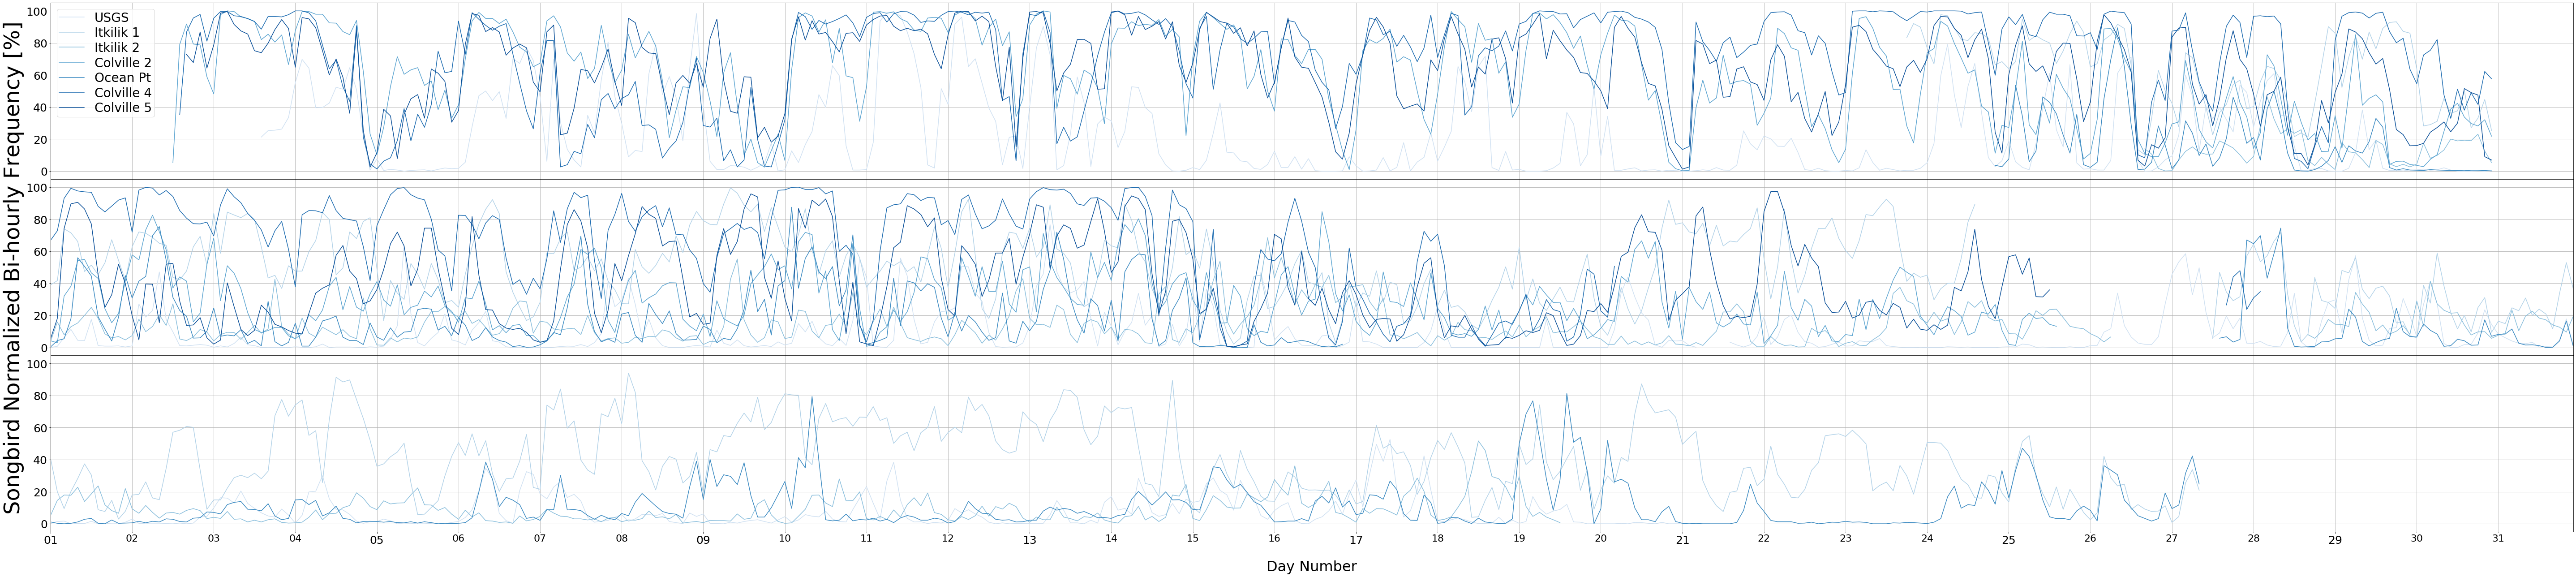

In [234]:

start = 0.1
stop = 0.6
number_of_lines= 8
# cm_subsection = linspace(start, stop, number_of_lines) 

# colors = iter([ cm.jet(x) for x in linspace(start, stop, number_of_lines) ])
plt.rcParams["axes.prop_cycle"] = get_cycle("Blues",N=8)


def splitSerToArr(ser):
    return [ser.index, ser.as_matrix()]

# fig = plt.figure(figsize=(120,6)) 

fig, ax = plt.subplots(figsize=(80,18),nrows=len(months),sharex=True, sharey=True,gridspec_kw={'hspace': 0})
# fig, axes = plt.subplots(nrows=2, ncols=2)


markers = itertools.cycle((',', '+', '.', 'o', '*')) 


# xs = range(df_freq["CLVL5"].shape[0])
# series1 = [1, 3, 3, None, None, 5, 8, 9]
# series2 = [2, None, 5, None, 4, None, 3, 2]

# s1 = pd.Series(df_freq["CLVL5"], index=xs)
# s2 = pd.Series(df_freq["ITKILLIK2"], index=xs)
# for col in df_freq.columns:
#     ax.plot( *splitSerToArr(df_freq[col].dropna()), linestyle='-', marker='o',label=col)
#     plt.plot( *splitSerToArr(df_freq["ITKILLIK2"].dropna()), linestyle='-', marker='o')
weather_colors=["firebrick","darkorange","green","seagreen","lightpink"]
for monthi,month in enumerate(months):
    # for col in df_freq.columns:
    for i,(col,(lat,long)) in enumerate(cord_list):
        if col in weather_cols:
            index=weather_cols.index(col)
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ",color=weather_colors[index])
        else:
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ")
        

ax[0].legend( labels=[id2name[x[0]] for x in cord_list],loc='upper left', 
            borderpad=0.2, labelspacing=0.2, fontsize=28, 
            frameon=True) # frameon=False to remove frame.


ax[1].set_ylabel('{} Normalized Bi-hourly Frequency [%]'.format(tag_name),fontsize=48) #, fontweight='black')

ax[-1].set_xlabel('Day Number', fontsize=32)


    
for an_ax in ax:
    
    locator=dates.DayLocator()
#     locator.intervald["DAILY"] = [1] 
    an_ax.xaxis.set_minor_locator(locator)
#     an_ax.xaxis.set_minor_locator(dates.HourLocator(byhour=range(0,25), interval=12))

#     an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%H'))
#     an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n'))

    an_ax.xaxis.grid(True, which="minor")
    an_ax.xaxis.grid(True, which="major")


    an_ax.xaxis.set_major_locator(dates.AutoDateLocator())
    an_ax.xaxis.set_major_formatter(dates.DateFormatter('%d\n'))

#     an_ax.xaxis.set_major_formatter(NullFormatter())

#     an_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1}%'))
    an_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    an_ax.yaxis.grid()
    an_ax.tick_params(labelsize=22,which="minor")
    an_ax.tick_params(labelsize=25,which="major")
    
plt.tight_layout()
plt.margins(x=0)


plt.show()
fig.savefig("TEST_"+tag_name+"_"+freq +'.svg')




In [214]:
print("{:.0f}".format(2.0))





2


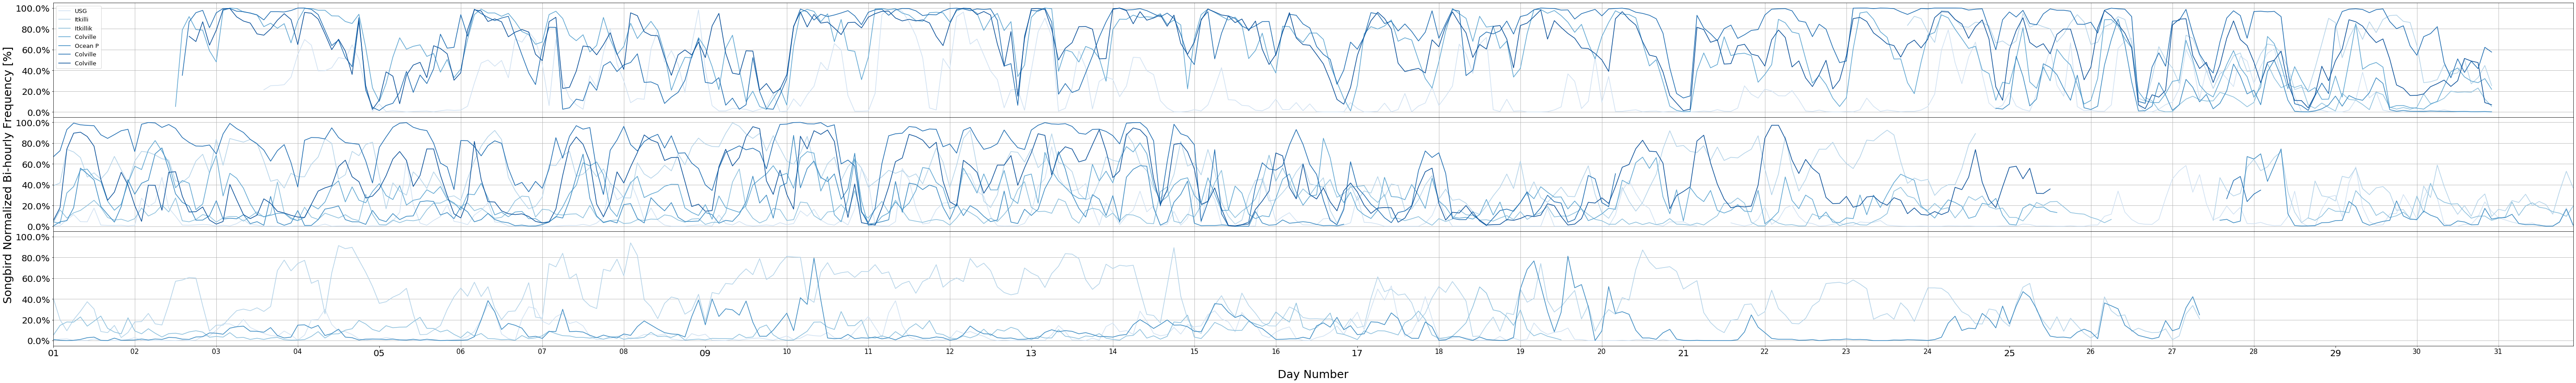

In [190]:

start = 0.1
stop = 0.6
number_of_lines= 8
# cm_subsection = linspace(start, stop, number_of_lines) 

# colors = iter([ cm.jet(x) for x in linspace(start, stop, number_of_lines) ])
plt.rcParams["axes.prop_cycle"] = get_cycle("Blues",N=8)


def splitSerToArr(ser):
    return [ser.index, ser.as_matrix()]

# fig = plt.figure(figsize=(120,6)) 

fig, ax = plt.subplots(figsize=(80,12),nrows=len(months),sharex=True, sharey=True,gridspec_kw={'hspace': 0})
# fig, axes = plt.subplots(nrows=2, ncols=2)


markers = itertools.cycle((',', '+', '.', 'o', '*')) 


# xs = range(df_freq["CLVL5"].shape[0])
# series1 = [1, 3, 3, None, None, 5, 8, 9]
# series2 = [2, None, 5, None, 4, None, 3, 2]

# s1 = pd.Series(df_freq["CLVL5"], index=xs)
# s2 = pd.Series(df_freq["ITKILLIK2"], index=xs)
# for col in df_freq.columns:
#     ax.plot( *splitSerToArr(df_freq[col].dropna()), linestyle='-', marker='o',label=col)
#     plt.plot( *splitSerToArr(df_freq["ITKILLIK2"].dropna()), linestyle='-', marker='o')
weather_colors=["firebrick","darkorange","green","seagreen","lightpink"]
for monthi,month in enumerate(months):
    # for col in df_freq.columns:
    for i,(col,(lat,long)) in enumerate(cord_list):
        if col in weather_cols:
            index=weather_cols.index(col)
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ",color=weather_colors[index])
        else:
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ")
        

ax[0].legend( labels=[id2name[x[0]] for x in cord_list],loc='upper left', 
            borderpad=0.4, labelspacing=0.5, fontsize=13, 
            frameon=True) # frameon=False to remove frame.

ax[1].set_ylabel('{} Normalized Bi-hourly Frequency [%]'.format(tag_name),fontsize=25) #, fontweight='black')

ax[-1].set_xlabel('Day Number', fontsize=25)


    
for an_ax in ax:
    
    locator=dates.DayLocator()
#     locator.intervald["DAILY"] = [1] 
    an_ax.xaxis.set_minor_locator(locator)
#     an_ax.xaxis.set_minor_locator(dates.HourLocator(byhour=range(0,25), interval=12))

#     an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%H'))
#     an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n'))

    an_ax.xaxis.grid(True, which="minor")


    an_ax.xaxis.set_major_locator(dates.AutoDateLocator())
    an_ax.xaxis.set_major_formatter(dates.DateFormatter('%d\n'))

#     an_ax.xaxis.set_major_formatter(NullFormatter())

#     an_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1}%'))
    an_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}%'))
    an_ax.yaxis.grid()
    an_ax.tick_params(labelsize=15,which="minor")
    an_ax.tick_params(labelsize=20,which="major")
    
plt.tight_layout()
plt.margins(x=0)


plt.show()
fig.savefig("all_"+tag_name+"_weather_"+freq +'.png')




In [579]:
# df_freq.plot(figsize=(110,6))

In [580]:

# idx = pd.date_range('2011-05-01', '2011-07-01')
# s = pd.Series(np.random.randn(len(idx)), index=idx)

# fig, ax = plt.subplots()
# ax.plot_date(idx.to_pydatetime(), s, 'v-')
# ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
#                                                 interval=1))
# ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
# ax.xaxis.grid(True, which="minor")
# ax.yaxis.grid()
# ax.xaxis.set_major_locator(dates.MonthLocator())
# ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
# plt.show()

In [581]:
# sample_per_tick=360
# # result_count=(bird_results.shape[0]//sample_per_tick) if bird_results.shape[0]%sample_per_tick==0 else (bird_results.shape[0]//sample_per_tick)+1
# # bird_results_gathered=np.empty((result_count))
# # for i in range(0,bird_results.shape[0],sample_per_tick):
# #     bird_results_gathered[i//sample_per_tick]= np.sum(bird_results[i:i+sample_per_tick]>0)
    
# #     break
# left=bird_results[-(bird_results.shape[0]%sample_per_tick):]
# rest=bird_results[:-(bird_results.shape[0]%sample_per_tick)]
# rest_gathered = np.sum(rest.reshape(-1, sample_per_tick)>0, axis=1)
# left_gathered =  np.sum(left.reshape(1, -1)>0, axis=1)
# gathered=np.concatenate((rest_gathered,left_gathered))


In [582]:
# gathered_results_copy=copy.deepcopy(gathered_results)

In [181]:
#https://stackoverflow.com/questions/30079590/use-matplotlib-color-map-for-color-cycle


def get_cycle(cmap, N=None, use_index="auto"):
    if isinstance(cmap, str):
        if use_index == "auto":
            if cmap in ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']:
                use_index=True
            else:
                use_index=False
        cmap = matplotlib.cm.get_cmap(cmap)
    if not N:
        N = cmap.N
    if use_index=="auto":
        if cmap.N > 100:
            use_index=False
        elif isinstance(cmap, LinearSegmentedColormap):
            use_index=False
        elif isinstance(cmap, ListedColormap):
            use_index=True
    if use_index:
        ind = np.arange(int(N)) % cmap.N
        return cycler("color",cmap(ind))
    else:
        colors = cmap(np.linspace(0.2,1,N))
        return cycler("color",colors)